In [43]:
from sklearn.datasets import load_iris,load_diabetes,load_digits
import pandas as pd
import numpy as np


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [5]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [24]:
# print(iris.DESCR)
array = iris.data
iris.feature_names
iris.target
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [50]:
diabetes = load_diabetes()
print(diabetes.DESCR)
array = diabetes.data
# diabetes.feature_names
# diabetes.target
# diabetes.target_names

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [27]:
df_iris = pd.DataFrame(array,columns=iris.feature_names)
df_iris['Species'] = iris.target
# df_iris

In [17]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [28]:
# print(digits.DESCR)
digit_data = digits.data
digits.feature_names
digits.target
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [35]:
df_digit = pd.DataFrame(digit_data,columns=digits.feature_names)
df_digit['Target'] = digits.target
df_digit.head(2)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1


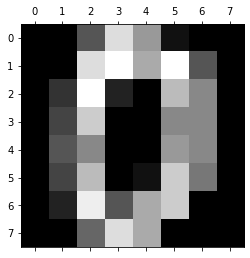

In [36]:
plt.matshow(digits.images[0])
plt.gray()

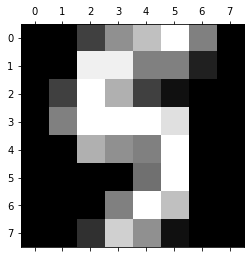

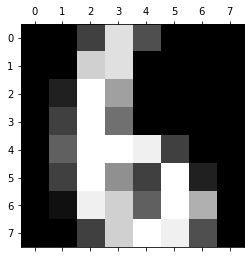

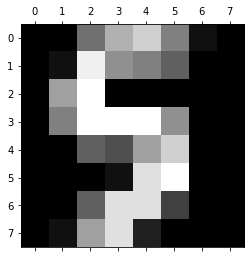

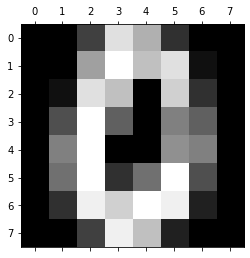

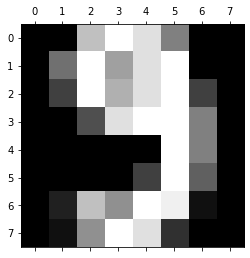

In [39]:
for i in range(1700,1705):
    plt.matshow(digits.images[i])
    plt.gray()

In [40]:
x = df_digit.drop('Target',axis = 1)
y = df_digit['Target']
# y

In [41]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2 , random_state=9)

In [44]:
lr_clf = LogisticRegression(multi_class='ovr')
lr_clf.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

In [47]:
## Accuracy on Testing dataset
y_pred = lr_clf.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred)
# print("Confusion Matrix is :\n",cnf_matrix)

clf_report = classification_report(y_test,y_pred)
print('Classification report is \n',clf_report)

multilabel_cnf_matrix = multilabel_confusion_matrix(y_test,y_pred)
print("MultiLabel Confusion Matrix :\n",multilabel_cnf_matrix)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy of Model is:",accuracy)

Classification report is 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      0.93      0.95        40
           2       1.00      1.00      1.00        45
           3       0.97      0.97      0.97        34
           4       0.95      0.95      0.95        41
           5       0.97      0.97      0.97        39
           6       0.97      1.00      0.98        29
           7       0.93      0.93      0.93        28
           8       0.94      0.92      0.93        36
           9       0.92      1.00      0.96        35

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360

MultiLabel Confusion Matrix :
 [[[327   0]
  [  1  32]]

 [[319   1]
  [  3  37]]

 [[315   0]
  [  0  45]]

 [[325   1]
  [  1  33]]

 [[317   2]
  [  2  39]]

 [[320   1]
  [  1  38]]

 [[330   1]
  [  0  29]]

 

In [48]:
## Accuracy on Training dataset

y_pred_train = lr_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix is :\n",cnf_matrix)

clf_report = classification_report(y_train,y_pred_train)
print('Classification report is \n',clf_report)

multilabel_cnf_matrix = multilabel_confusion_matrix(y_train,y_pred_train)
print("MultiLabel Confusion Matrix :\n",multilabel_cnf_matrix)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy of Model is:",accuracy)

Confusion Matrix is :
 [[145   0   0   0   0   0   0   0   0   0]
 [  0 140   0   0   0   0   0   0   2   0]
 [  0   0 132   0   0   0   0   0   0   0]
 [  0   0   0 149   0   0   0   0   0   0]
 [  0   0   0   0 140   0   0   0   0   0]
 [  0   0   0   0   0 143   0   0   0   0]
 [  0   0   0   0   0   0 152   0   0   0]
 [  0   0   0   0   0   0   0 151   0   0]
 [  0   4   0   0   0   0   0   0 134   0]
 [  0   0   0   0   0   0   0   0   2 143]]
Classification report is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       0.97      0.99      0.98       142
           2       1.00      1.00      1.00       132
           3       1.00      1.00      1.00       149
           4       1.00      1.00      1.00       140
           5       1.00      1.00      1.00       143
           6       1.00      1.00      1.00       152
           7       1.00      1.00      1.00       151
           8       0.97      0.9